<a href="https://colab.research.google.com/github/rrhkwk123/Work/blob/main/bank2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

campaign['emp.var.rate'].value_counts()


 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [ ]:
# creating a socioeconomic score for customers
for index in campaign.index:
  campaign.loc[index, 'socio_ec'] = 0

campaign.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'socio_ec'],
      dtype='object')

In [ ]:
#job type is associated with salary
for index in campaign.index:
  if campaign.loc[index, 'job'] == 'admin.':
    campaign.loc[index, 'socio_ec'] += 2
  elif campaign.loc[index, 'job'] == 'blue-collar':
    campaign.loc[index, 'socio_ec'] += 3
  elif campaign.loc[index, 'job'] == 'technician':
    campaign.loc[index, 'socio_ec'] += 4
  elif campaign.loc[index, 'job'] == 'services':
    campaign.loc[index, 'socio_ec'] += 1
  elif campaign.loc[index, 'job'] == 'management':
    campaign.loc[index, 'socio_ec'] += 6
  elif campaign.loc[index, 'job'] == 'retired':
    campaign.loc[index, 'socio_ec'] += 4
  elif campaign.loc[index, 'job'] == 'entrepreneur':
    campaign.loc[index, 'socio_ec'] += 4
  elif campaign.loc[index, 'job'] == 'self-employed':
    campaign.loc[index, 'socio_ec'] += 4
  elif campaign.loc[index, 'job'] == 'housemaid':
    campaign.loc[index, 'socio_ec'] += 1
  elif campaign.loc[index, 'job'] == 'unemployed':
    campaign.loc[index, 'socio_ec'] -= 2
  elif campaign.loc[index, 'job'] == 'student':
    campaign.loc[index, 'socio_ec'] += 0
#age tends to be positively correlated with wealth
for index in campaign.index:
  if campaign.loc[index, 'age'] <= 30:
    campaign.loc[index, 'socio_ec'] -= 1
  elif 30 < campaign.loc[index, 'age'] <= 50:
    campaign.loc[index, 'socio_ec'] += 2
  elif campaign.loc[index, 'age'] > 50:
    campaign.loc[index, 'socio_ec'] += 4
#married people are typically better of than single people, but divorce is expensive
for index in campaign.index:
  if campaign.loc[index, 'marital'] == 'married':
    campaign.loc[index, 'socio_ec'] += 3
  elif campaign.loc[index, 'marital'] == 'single':
    campaign.loc[index, 'socio_ec'] += 1
  elif campaign.loc[index, 'marital'] == 'divorced':
    campaign.loc[index, 'socio_ec'] -= 3
#level of education is often associated with income
for index in campaign.index:
  if campaign.loc[index, 'education'] == 'university.degree':
    campaign.loc[index, 'socio_ec'] += 8
  elif campaign.loc[index, 'education'] == 'high.school':
    campaign.loc[index, 'socio_ec'] += 4
  elif campaign.loc[index, 'education'] == 'basic.9y':
    campaign.loc[index, 'socio_ec'] += 3
  elif campaign.loc[index, 'education'] == 'basic.6y':
    campaign.loc[index, 'socio_ec'] += 2
  elif campaign.loc[index, 'education'] == 'basic.4y':
    campaign.loc[index, 'socio_ec'] += 1
  elif campaign.loc[index, 'education'] == 'professional.course':
    campaign.loc[index, 'socio_ec'] += 6
  elif campaign.loc[index, 'education'] == 'illiterate':
    campaign.loc[index, 'socio_ec'] -= 4
#default is used as a rough indicator of credit score
for index in campaign.index:
  if campaign.loc[index, 'default'] == 'yes':
    campaign.loc[index, 'socio_ec'] -= 10
  elif campaign.loc[index, 'default'] == 'no':
    campaign.loc[index, 'socio_ec'] += 2
#being loan free is rough indicator of debt to income ratio
for index in campaign.index:
  if campaign.loc[index, 'loan'] == 'no':
    campaign.loc[index, 'socio_ec'] += 2

campaign['socio_ec'].value_counts()

 13.0    4508
 19.0    4455
 15.0    4296
 17.0    4176
 14.0    3701
 12.0    2946
 11.0    2869
 16.0    2233
 10.0    2150
 21.0    2077
 9.0     1809
 8.0     1404
 23.0    1143
 7.0      860
 18.0     819
 6.0      570
 5.0      358
 25.0     242
 4.0      236
 20.0     140
 3.0       95
 2.0       69
 1.0       17
 0.0        9
 22.0       4
-1.0        2
Name: socio_ec, dtype: int64

In [ ]:
for index in campaign.index:
  campaign.loc[index, 'overall_ec'] = 0

In [ ]:
campaign['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

In [ ]:
for index in campaign.index:
  if campaign.loc[index, 'emp.var.rate'] < -1:
    campaign.loc[index, 'overall_ec'] -= 2
  elif campaign.loc[index, 'emp.var.rate'] > 1:
    campaign.loc[index, 'socio_ec'] += 2

for index in campaign.index:
  if campaign.loc[index, 'cons.price.idx'] > 93:
    campaign.loc[index, 'overall_ec'] -= 1
  elif campaign.loc[index, 'cons.price.idx'] <= 93:
    campaign.loc[index, 'overall_ec'] += 1

for index in campaign.index:
  if campaign.loc[index, 'cons.conf.idx'] > -25:
    campaign.loc[index, 'overall_ec'] += 1
  elif campaign.loc[index, 'cons.conf.idx'] < -50:
    campaign.loc[index, 'overall_ec'] -= 2

for index in campaign.index:
  if campaign.loc[index, 'euribor3m'] > 4:
    campaign.loc[index, 'overall_ec'] += 2
  elif campaign.loc[index, 'euribor3m'] < 2:
    campaign.loc[index, 'overall_ec'] -= 2

campaign['overall_ec'].value_counts()

 1.0    27686
-3.0     8982
-5.0     4388
-7.0      128
-1.0        4
Name: overall_ec, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

new_features = ['socio_ec', 'overall_ec']
x = campaign[new_features]
y = campaign['y'].map(dict(yes=1, no=0))

sm = SMOTE(random_state=42)
x_SMOTE, y_SMOTE = sm.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_SMOTE, y_SMOTE, test_size=0.30, random_state=42)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, x_train, y_train, cv=3)
tree_mean = tree_scores.mean()
tree_clf_y_train_pred = cross_val_predict(tree_clf, x_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

print('Decision Tree Scores')
print('Precision Score: ', precision_score(y_train, tree_clf_y_train_pred))
print('Recall Score: ', recall_score(y_train, tree_clf_y_train_pred))

Decision Tree Scores
Precision Score:  0.7220166876574308
Recall Score:  0.7159303777708398


Feature ranking:
1. feature 1 (0.994677)
2. feature 0 (0.005323)


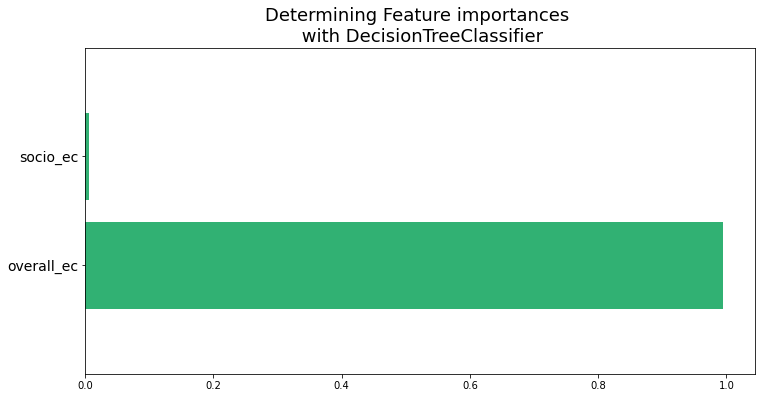

In [ ]:
decision_tree = tree.DecisionTreeClassifier( 
    class_weight='balanced')

decision_tree.fit(x_train, y_train)
importances = decision_tree.feature_importances_
feature_names = campaign[new_features].columns
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()